# ROI detection on text images

## Goal
The goal of this task is to detect interested regions of interests (ROIs) in images (printed text or written text). The ROIs will be provided for annotation classification (annotated or non-annotated image).

## Approachs
Steps to finish the ROIs detection:
1. Load an image into memory
2. Perform Image processing, e.g., grayscale
3. Configure an OCR Engine (e.g., Tesseract)
4. Apply the OCR Engine on the image to obtain a list of detection
5. Run the ROIs algorithm to obtain a list of refined ROIs (bounding box location, x,y,width,height)
6. Plot the bounding box and save the boxes into a corresponding txt file.

Several classes are needed in this work:
- Utils.py
- OCREngine.py
- ImgProcessor.py
- Plot.py

## Package configuration
- Python3.6
- Tessearct 3.05, leptonica-1.74.4, instructions:
    - a. overall: https://lucacerone.net/2017/install-tesseract-3-0-5-in-ubuntu-16-04/
    - b. download the english language package, tesseract-ocr-3.02.eng.tar.gz, and put them into /usr/local/share/tessdata
        - https://github.com/tesseract-ocr/tesseract/wiki/Data-Files#cube-data-files-for-version-304305
- pyTesseract 0.2.0
- Ubuntu 14.04
- Pillow, "conda install pillow" for python3.6
- cv3 for python3.6, conda install -c menpo opencv3


In [4]:
%load_ext autoreload
%autoreload 2

from lib.ImgProcessor import ImgProcessor
import matplotlib.pyplot as plt
import numpy as np


# 1. Define the image
root_dir = './sample/positive'
fname = '30.png'
f = '%s/%s' % (root_dir,fname)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


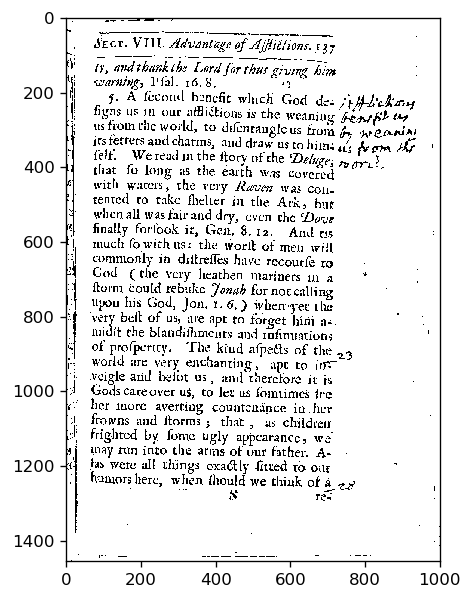

In [6]:
# 2. Load the image
imgProcessor = ImgProcessor()
img = imgProcessor.loadImage(inFilename=f)

# plot
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(img, cmap='gray')

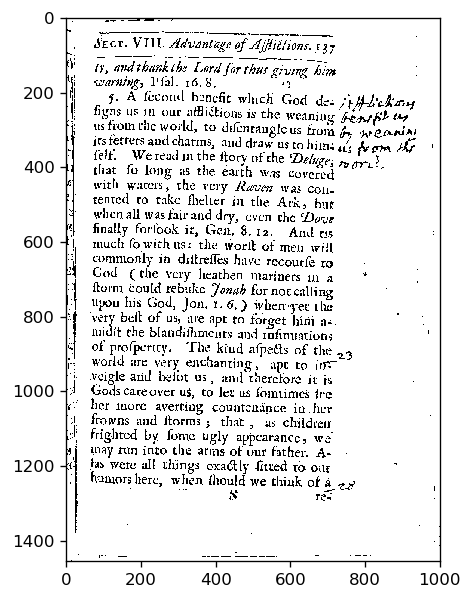

In [7]:
# 3. preprocess the image
img = imgProcessor.quickPreprocess(img)

# plot
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(img, cmap='gray')

In [9]:
#4. Load the tessearct engine
from lib.OCREngine import OCREngine

# define engine
ocr = OCREngine('tesseract')

# perform ocr
data = ocr.tess_image_to_data(img)
print(data)


TesseractError: (1, 'Error opening data file /usr/local/share/tessdata/eng.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to the parent directory of your "tessdata" directory. Failed loading language \'eng\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [ ]:
from ImageROI import ImageROI

# Load the bounding 